In [465]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
# pandas configs
main_df = pd.read_csv("football.csv")
pd.set_option("display.max_columns", None)

In [466]:
main_df.shape

(7772, 66)

In [467]:
main_df.head(5)

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_jersey_number,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,158023,L. Messi,93,93,78000000.0,320000.0,34,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,30.0,10.0,Left,4,4,5,Medium/Low,Unique,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,1
1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,9.0,9.0,Right,4,4,5,High/Medium,Unique,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,1
2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,11.0,Manchester United,English Premier League,1.0,7.0,7.0,Right,4,5,5,High/Low,Unique,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,1
3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,10.0,NaN,Right,5,5,5,High/Medium,Unique,238700000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play...",91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,1
4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,10.0,Manchester City,English Premier League,1.0,17.0,7.0,Right,5,4,4,High/High,Unique,232200000.0,"#Dribbler, #Playmaker, #Engine, #Distance Shoo...","Injury Prone, Leadership, Early Crosser, Long ...",76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,1


In [468]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    7772 non-null   int64  
 1   short_name                   7772 non-null   object 
 2   overall                      7772 non-null   int64  
 3   potential                    7772 non-null   int64  
 4   value_eur                    7706 non-null   float64
 5   wage_eur                     7711 non-null   float64
 6   age                          7772 non-null   int64  
 7   height_cm                    7772 non-null   int64  
 8   weight_kg                    7772 non-null   int64  
 9   club_team_id                 7711 non-null   float64
 10  club_name                    7711 non-null   object 
 11  league_name                  7711 non-null   object 
 12  league_level                 7711 non-null   float64
 13  club_jersey_number

In [469]:
print("catagorical columns:")
display(main_df.select_dtypes(include=["object"]).columns.to_list())
print("Numerical  columns:")
main_df.select_dtypes(include='number').columns.to_list()

catagorical columns:


['short_name',
 'club_name',
 'league_name',
 'preferred_foot',
 'work_rate',
 'body_type',
 'player_tags',
 'player_traits']

Numerical  columns:


['sofifa_id',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'league_level',
 'club_jersey_number',
 'nation_jersey_number',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'release_clause_eur',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'de

In [470]:
def missing(main_df):
    missing_percentage = (main_df.isnull().sum() / len(main_df)) * 100
    missing_rows_per_column = main_df.isnull().sum()
    missing_df = pd.DataFrame({'Column_Name': main_df.columns,'Missing_Rows': missing_rows_per_column.values, 'Missing_Percentage': missing_percentage})
    missing_df = missing_df.sort_values(by='Missing_Percentage', ascending=False)
    pd.set_option('display.max_rows', None)
    columns_with_missing = missing_df[missing_df['Missing_Percentage'] > 0]
    display(columns_with_missing)
missing(main_df)

,Column_Name,Missing_Rows,Missing_Percentage
nation_jersey_number,nation_jersey_number,7239,93.142048
goalkeeping_speed,goalkeeping_speed,7063,90.877509
player_tags,player_tags,6900,88.780237
player_traits,player_traits,2901,37.326300
physic,physic,709,9.122491
dribbling,dribbling,709,9.122491
passing,passing,709,9.122491
shooting,shooting,709,9.122491
pace,pace,709,9.122491
defending,defending,709,9.122491


In [471]:
req_col = ['overall',
 'potential',
 'weak_foot',
 'skill_moves',
 'pace',
  'age',
 'height_cm',
 'weight_kg',
 'value_eur',
 'wage_eur',
 'shooting',
 'release_clause_eur',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'contribution_type',
 'club_team_id'
]
main_df = main_df[req_col]
missing(main_df)

,Column_Name,Missing_Rows,Missing_Percentage
physic,physic,709,9.122491
defending,defending,709,9.122491
dribbling,dribbling,709,9.122491
pace,pace,709,9.122491
passing,passing,709,9.122491
shooting,shooting,709,9.122491
release_clause_eur,release_clause_eur,466,5.995883
value_eur,value_eur,66,0.849202
wage_eur,wage_eur,61,0.784869
club_team_id,club_team_id,61,0.784869


In [472]:
display(main_df[['dribbling','pace','physic','defending','passing','shooting']].describe())


,dribbling,pace,physic,defending,passing,shooting
count,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000,7063.000000
mean,64.637689,68.607107,68.312473,55.528529,60.148096,54.401954
std,9.363637,11.701207,8.515295,15.643798,9.579853,14.351594
min,29.000000,28.000000,31.000000,16.000000,25.000000,18.000000
25%,59.000000,62.000000,63.000000,42.500000,54.000000,44.000000
50%,65.000000,70.000000,69.000000,61.000000,61.000000,57.000000
75%,71.000000,77.000000,74.000000,67.000000,67.000000,65.000000
max,95.000000,97.000000,90.000000,91.000000,93.000000,94.000000


In [473]:
cols = ['dribbling','pace','physic','passing','shooting']
main_df[cols]=main_df[cols].fillna(main_df.mode().iloc[0])
main_df.dropna(inplace=True)
missing(main_df)

,Column_Name,Missing_Rows,Missing_Percentage


In [474]:
threshold = 0.9  #
#  pairs with high correlation
corr = main_df.corr()
highly_correlated_pairs = []
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) >= threshold:
            pair = (corr.columns[i], corr.columns[j])
            highly_correlated_pairs.append(pair)
print(highly_correlated_pairs)
for var1, var2 in highly_correlated_pairs:
    if var2 in main_df:
        main_df.drop(columns=[var2],inplace=True)

[('release_clause_eur', 'value_eur'), ('attacking_finishing', 'shooting'), ('skill_dribbling', 'dribbling'), ('skill_ball_control', 'dribbling'), ('movement_acceleration', 'pace'), ('movement_sprint_speed', 'pace'), ('power_long_shots', 'shooting'), ('mentality_interceptions', 'defending'), ('defending_marking_awareness', 'defending'), ('defending_marking_awareness', 'mentality_interceptions'), ('defending_standing_tackle', 'defending'), ('defending_standing_tackle', 'mentality_interceptions'), ('defending_standing_tackle', 'defending_marking_awareness'), ('defending_sliding_tackle', 'defending'), ('defending_sliding_tackle', 'mentality_interceptions'), ('defending_sliding_tackle', 'defending_marking_awareness'), ('defending_sliding_tackle', 'defending_standing_tackle')]


In [475]:
main_df.columns

Index(['overall', 'potential', 'weak_foot', 'skill_moves', 'age', 'height_cm',
       'weight_kg', 'wage_eur', 'release_clause_eur', 'passing', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'mentality_composure',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'contribution_type',
       'club_team_id'],
      dtype='object')

In [476]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler().set_output(transform="pandas")

data = main_df.groupby('club_team_id').mean().reset_index()
data.drop(columns='club_team_id',inplace=True)
data = std_scaler.fit_transform(data)
data.shape

(701, 43)

/home/fledlucifer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/fledlucifer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fledlucifer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fledlucifer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fledlucifer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

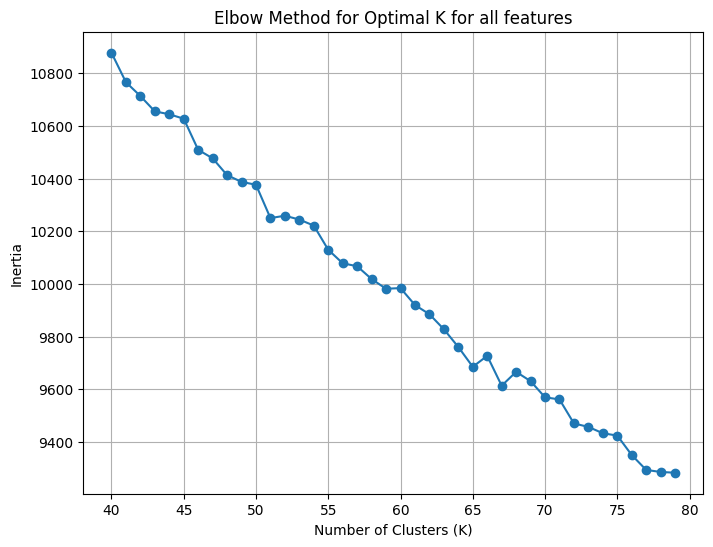

[10877.541515555436, 10765.74872144087, 10713.155131346324, 10655.000299085597, 10643.889520684648, 10627.123069688776, 10508.974846946936, 10476.73342757454, 10412.848436164164, 10387.249665706146, 10376.374312129881, 10249.880279175828, 10258.783894225508, 10244.208028898785, 10221.38748229762, 10129.529927321404, 10078.297788054993, 10067.121427594944, 10018.438922366167, 9981.613391085364, 9984.117508775216, 9919.841081760582, 9884.983850652883, 9827.948097106659, 9760.515198868905, 9685.392798336077, 9726.844614510279, 9613.580018033223, 9666.209077229369, 9630.832998698135, 9569.547302818111, 9561.51881535894, 9470.364497142253, 9457.194783324581, 9433.095912618855, 9424.257586573085, 9350.390757013816, 9293.869530782524, 9286.145394300114, 9283.28237880961]


In [477]:
from sklearn.cluster import KMeans

# Initialize a list to store the inertia for different values of K for all features
inertia = []

# Try different values of K
for k in range(40,80):  # You can adjust the range of K as needed
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(40,80), inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K for all features')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
print(inertia)

/home/fledlucifer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fledlucifer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fledlucifer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/fledlucifer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

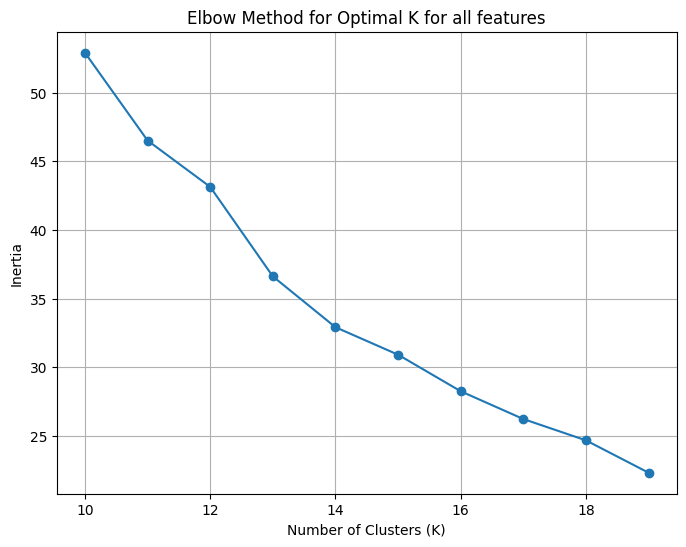

[52.91225175915587, 46.51710623785943, 43.13920037701083, 36.619768430234444, 32.918278560365486, 30.915808863400407, 28.25348934458692, 26.229448205643482, 24.676639890858304, 22.319442896107653]


In [478]:
inertia = []
data = data[['wage_eur', 'release_clause_eur']]
# Try different values of K
for k in range(10,20):  # You can adjust the range of K as needed
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
l = kmeans.labels_
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(10,20), inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K for all features')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
print(inertia)

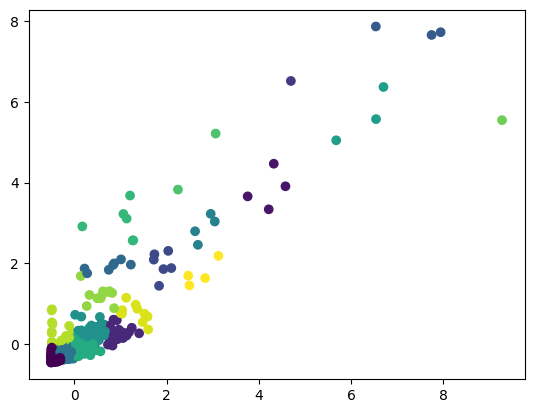

In [479]:
plt.scatter(data['wage_eur'],data['release_clause_eur'],c=l)